In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
import json
import numpy as np
import pandas as pd
import random

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    plot_confusion_matrix,
)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from weight_lifting import WeightLifting
from sfs_features import (
    get_lr_features,
    get_svm_features,
    get_mpl_features,
    get_dtc_features
)
from features import timed_features, summary_features

from sklearn.ensemble import IsolationForest

In [4]:
np.random.seed(42)
random.seed(42)

### BASE PADRAO

In [5]:
engine = WeightLifting()
df = engine.load_df()
df = engine.transform(df)
X_train, X_test, y_train, y_test = engine.create_train_test(df)
base_padrao_predict = engine.fit_and_predict(X_train, X_test, y_train, y_test, state="INICIAL")
df.shape

(4024, 153)

Model: LR
            Valor
Accuracy   0.9652
F1         0.9363
Precision  0.9263
Recall     0.9504

[[319   6   0   0   0]
 [ 14 196   8   0   0]
 [  1   1  24   0   0]
 [  0   0   0  62   3]
 [  0   0   0   2 370]]

              precision    recall  f1-score      support
A              0.955090  0.981538  0.968134   325.000000
B              0.965517  0.899083  0.931116   218.000000
C              0.750000  0.923077  0.827586    26.000000
D              0.968750  0.953846  0.961240    65.000000
E              0.991957  0.994624  0.993289   372.000000
accuracy       0.965209  0.965209  0.965209     0.965209
macro avg      0.926263  0.950434  0.936273  1006.000000
weighted avg   0.966564  0.965209  0.965336  1006.000000



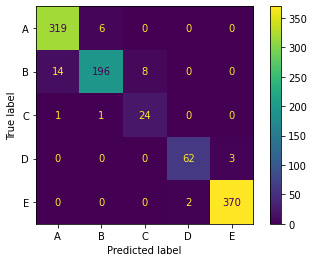

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9821
F1         0.9731
Precision  0.9899
Recall     0.9582

[[320   0   0   0   5]
 [  0 211   0   0   7]
 [  0   2  23   0   1]
 [  0   0   0  62   3]
 [  0   0   0   0 372]]

              precision    recall  f1-score      support
A              1.000000  0.984615  0.992248   325.000000
B              0.990610  0.967890  0.979118   218.000000
C              1.000000  0.884615  0.938776    26.000000
D              1.000000  0.953846  0.976378    65.000000
E              0.958763  1.000000  0.978947   372.000000
accuracy       0.982107  0.982107  0.982107     0.982107
macro avg      0.989875  0.958193  0.973093  1006.000000
weighted avg   0.982717  0.982107  0.982077  1006.000000



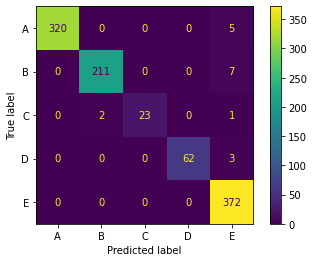

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.3231
F1         0.0977
Precision  0.0646
Recall     0.2000

[[325   0   0   0   0]
 [218   0   0   0   0]
 [ 26   0   0   0   0]
 [ 65   0   0   0   0]
 [372   0   0   0   0]]

              precision    recall  f1-score      support
A              0.323062  1.000000  0.488355   325.000000
B              0.000000  0.000000  0.000000   218.000000
C              0.000000  0.000000  0.000000    26.000000
D              0.000000  0.000000  0.000000    65.000000
E              0.000000  0.000000  0.000000   372.000000
accuracy       0.323062  0.323062  0.323062     0.323062
macro avg      0.064612  0.200000  0.097671  1006.000000
weighted avg   0.104369  0.323062  0.157769  1006.000000



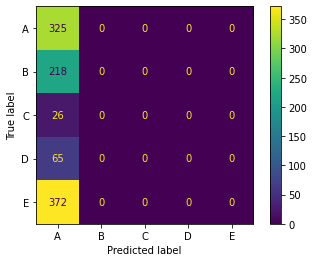

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.7097
F1         0.4390
Precision  0.4480
Recall     0.4733

[[183 140   0   0   2]
 [ 12 198   0   0   8]
 [  0  23   0   0   3]
 [  0   0   0   0  65]
 [  1  38   0   0 333]]

              precision    recall  f1-score      support
A              0.933673  0.563077  0.702495   325.000000
B              0.496241  0.908257  0.641815   218.000000
C              0.000000  0.000000  0.000000    26.000000
D              0.000000  0.000000  0.000000    65.000000
E              0.810219  0.895161  0.850575   372.000000
accuracy       0.709742  0.709742  0.709742     0.709742
macro avg      0.448027  0.473299  0.438977  1006.000000
weighted avg   0.708773  0.709742  0.680557  1006.000000



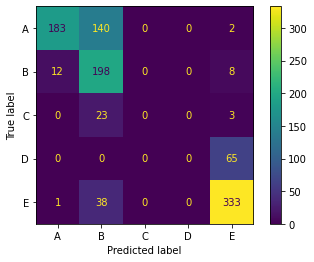

--------------------------------------------


In [6]:
engine.plot_results(base_padrao_predict, X_test, y_test)

## Pré processamento

In [7]:
df = engine.load_df()
df = engine.clean_data(df)
df = engine.select_features(df)
X_train, X_test, y_train, y_test = engine.create_train_test(df)
fse_predict = engine.fit_and_predict(X_train, X_test, y_train, y_test, state="FSE")
# df.shape

Model: LR
            Valor
Accuracy   0.9929
F1         0.9862
Precision  0.9810
Recall     0.9921

[[326   2   0   0   0]
 [  2 220   2   0   0]
 [  0   0  24   0   0]
 [  0   0   0  63   1]
 [  0   0   0   0 344]]

              precision    recall  f1-score     support
A              0.993902  0.993902  0.993902  328.000000
B              0.990991  0.982143  0.986547  224.000000
C              0.923077  1.000000  0.960000   24.000000
D              1.000000  0.984375  0.992126   64.000000
E              0.997101  1.000000  0.998549  344.000000
accuracy       0.992886  0.992886  0.992886    0.992886
macro avg      0.981014  0.992084  0.986225  984.000000
weighted avg   0.993027  0.992886  0.992910  984.000000



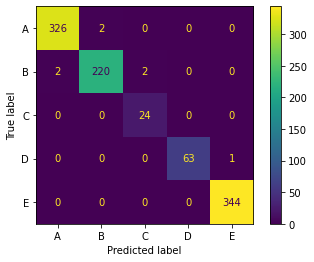

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9990
F1         0.9953
Precision  0.9991
Recall     0.9917

[[328   0   0   0   0]
 [  0 224   0   0   0]
 [  0   1  23   0   0]
 [  0   0   0  64   0]
 [  0   0   0   0 344]]

              precision    recall  f1-score     support
A              1.000000  1.000000  1.000000  328.000000
B              0.995556  1.000000  0.997773  224.000000
C              1.000000  0.958333  0.978723   24.000000
D              1.000000  1.000000  1.000000   64.000000
E              1.000000  1.000000  1.000000  344.000000
accuracy       0.998984  0.998984  0.998984    0.998984
macro avg      0.999111  0.991667  0.995299  984.000000
weighted avg   0.998988  0.998984  0.998974  984.000000



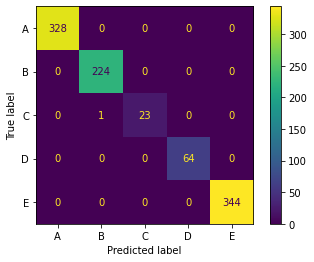

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.3333
F1         0.1000
Precision  0.0667
Recall     0.2000

[[328   0   0   0   0]
 [224   0   0   0   0]
 [ 24   0   0   0   0]
 [ 64   0   0   0   0]
 [344   0   0   0   0]]

              precision    recall  f1-score     support
A              0.333333  1.000000  0.500000  328.000000
B              0.000000  0.000000  0.000000  224.000000
C              0.000000  0.000000  0.000000   24.000000
D              0.000000  0.000000  0.000000   64.000000
E              0.000000  0.000000  0.000000  344.000000
accuracy       0.333333  0.333333  0.333333    0.333333
macro avg      0.066667  0.200000  0.100000  984.000000
weighted avg   0.111111  0.333333  0.166667  984.000000



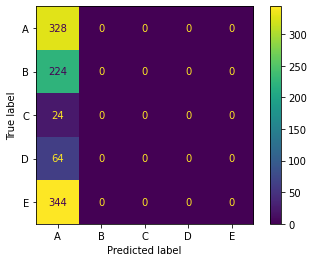

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.6372
F1         0.5195
Precision  0.5617
Recall     0.5701

[[166 151   0   6   5]
 [ 10 212   0   0   2]
 [  4  20   0   0   0]
 [  0   9   0  53   2]
 [  6 101   0  41 196]]

              precision    recall  f1-score     support
A              0.892473  0.506098  0.645914  328.000000
B              0.430020  0.946429  0.591353  224.000000
C              0.000000  0.000000  0.000000   24.000000
D              0.530000  0.828125  0.646341   64.000000
E              0.956098  0.569767  0.714026  344.000000
accuracy       0.637195  0.637195  0.637195    0.637195
macro avg      0.561718  0.570084  0.519527  984.000000
weighted avg   0.764099  0.637195  0.641579  984.000000



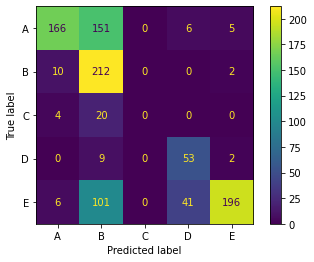

--------------------------------------------


In [8]:
engine.plot_results(fse_predict, X_test, y_test)

## Remoção de features correlacionadas

In [9]:
df = engine.remove_correlated_features(df)
cor_X_train, cor_X_test, cor_y_train, cor_y_test = engine.create_train_test(df)
cor_predict = engine.fit_and_predict(cor_X_train, cor_X_test, cor_y_train, cor_y_test, state="COR")

Model: LR
            Valor
Accuracy   0.9431
F1         0.9008
Precision  0.8948
Recall     0.9090

[[313  11   4   0   0]
 [ 24 195   5   0   0]
 [  1   4  19   0   0]
 [  0   0   0  60   4]
 [  0   0   0   3 341]]

              precision    recall  f1-score     support
A              0.926036  0.954268  0.939940  328.000000
B              0.928571  0.870536  0.898618  224.000000
C              0.678571  0.791667  0.730769   24.000000
D              0.952381  0.937500  0.944882   64.000000
E              0.988406  0.991279  0.989840  344.000000
accuracy       0.943089  0.943089  0.943089    0.943089
macro avg      0.894793  0.909050  0.900810  984.000000
weighted avg   0.944095  0.943089  0.943198  984.000000



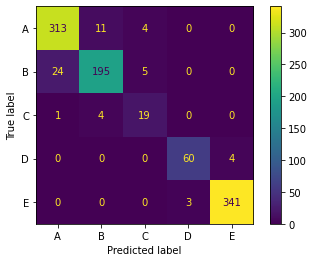

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9990
F1         0.9953
Precision  0.9991
Recall     0.9917

[[328   0   0   0   0]
 [  0 224   0   0   0]
 [  0   1  23   0   0]
 [  0   0   0  64   0]
 [  0   0   0   0 344]]

              precision    recall  f1-score     support
A              1.000000  1.000000  1.000000  328.000000
B              0.995556  1.000000  0.997773  224.000000
C              1.000000  0.958333  0.978723   24.000000
D              1.000000  1.000000  1.000000   64.000000
E              1.000000  1.000000  1.000000  344.000000
accuracy       0.998984  0.998984  0.998984    0.998984
macro avg      0.999111  0.991667  0.995299  984.000000
weighted avg   0.998988  0.998984  0.998974  984.000000



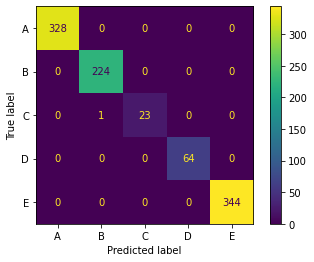

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.3333
F1         0.1000
Precision  0.0667
Recall     0.2000

[[328   0   0   0   0]
 [224   0   0   0   0]
 [ 24   0   0   0   0]
 [ 64   0   0   0   0]
 [344   0   0   0   0]]

              precision    recall  f1-score     support
A              0.333333  1.000000  0.500000  328.000000
B              0.000000  0.000000  0.000000  224.000000
C              0.000000  0.000000  0.000000   24.000000
D              0.000000  0.000000  0.000000   64.000000
E              0.000000  0.000000  0.000000  344.000000
accuracy       0.333333  0.333333  0.333333    0.333333
macro avg      0.066667  0.200000  0.100000  984.000000
weighted avg   0.111111  0.333333  0.166667  984.000000



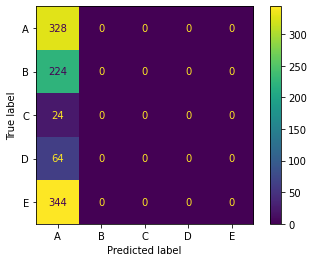

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.7602
F1         0.4732
Precision  0.4570
Recall     0.4936

[[290  29   0   0   9]
 [ 62 162   0   0   0]
 [  1  23   0   0   0]
 [  6   0   0   0  58]
 [ 48   0   0   0 296]]

              precision    recall  f1-score     support
A              0.712531  0.884146  0.789116  328.000000
B              0.757009  0.723214  0.739726  224.000000
C              0.000000  0.000000  0.000000   24.000000
D              0.000000  0.000000  0.000000   64.000000
E              0.815427  0.860465  0.837341  344.000000
accuracy       0.760163  0.760163  0.760163    0.760163
macro avg      0.456993  0.493565  0.473237  984.000000
weighted avg   0.694906  0.760163  0.724160  984.000000



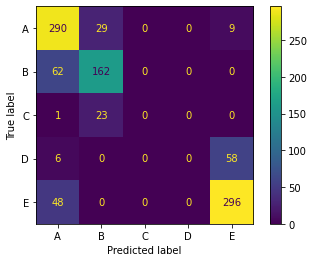

--------------------------------------------


In [10]:
engine.plot_results(cor_predict, cor_X_test, cor_y_test)

### ISOLATION FOREST

In [11]:
iso = IsolationForest(contamination=0.05)
predict = iso.fit_predict(df.iloc[:, 0:-1])

mask = predict != -1

iso_X_train, iso_X_test, iso_y_train, iso_y_test = engine.create_train_test(df.iloc[mask])

isolation_predict = engine.fit_and_predict(iso_X_train, iso_X_test, iso_y_train, iso_y_test, state="ISO")

Model: LR
            Valor
Accuracy   0.9380
F1         0.9073
Precision  0.9112
Recall     0.9040

[[315  17   2   0   0]
 [ 21 191   3   0   0]
 [  3   4  21   0   0]
 [  0   0   0  65   3]
 [  0   0   0   5 285]]

              precision    recall  f1-score     support
A              0.929204  0.943114  0.936107  334.000000
B              0.900943  0.888372  0.894614  215.000000
C              0.807692  0.750000  0.777778   28.000000
D              0.928571  0.955882  0.942029   68.000000
E              0.989583  0.982759  0.986159  290.000000
accuracy       0.937968  0.937968  0.937968    0.937968
macro avg      0.911199  0.904025  0.907337  935.000000
weighted avg   0.937748  0.937968  0.937779  935.000000



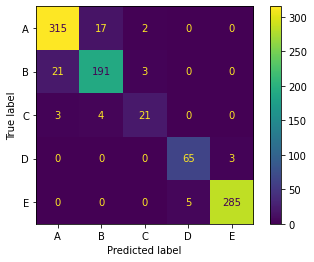

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9968
F1         0.9904
Precision  0.9838
Recall     0.9974

[[334   0   0   0   0]
 [  0 213   2   0   0]
 [  0   0  28   0   0]
 [  0   0   0  68   0]
 [  0   0   0   1 289]]

              precision    recall  f1-score     support
A              1.000000  1.000000  1.000000  334.000000
B              1.000000  0.990698  0.995327  215.000000
C              0.933333  1.000000  0.965517   28.000000
D              0.985507  1.000000  0.992701   68.000000
E              1.000000  0.996552  0.998273  290.000000
accuracy       0.996791  0.996791  0.996791    0.996791
macro avg      0.983768  0.997450  0.990364  935.000000
weighted avg   0.996950  0.996791  0.996826  935.000000



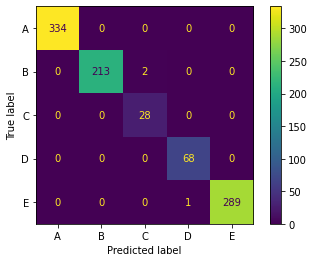

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.6984
F1         0.4630
Precision  0.4758
Recall     0.4966

[[334   0   0   0   0]
 [215   0   0   0   0]
 [ 28   0   0   0   0]
 [  7   0   0  34  27]
 [  1   0   0   4 285]]

              precision    recall  f1-score     support
A              0.570940  1.000000  0.726877  334.000000
B              0.000000  0.000000  0.000000  215.000000
C              0.000000  0.000000  0.000000   28.000000
D              0.894737  0.500000  0.641509   68.000000
E              0.913462  0.982759  0.946844  290.000000
accuracy       0.698396  0.698396  0.698396    0.698396
macro avg      0.475828  0.496552  0.463046  935.000000
weighted avg   0.552342  0.698396  0.599983  935.000000



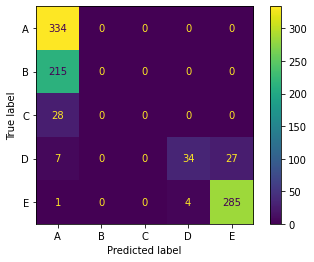

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.7818
F1         0.4782
Precision  0.4753
Recall     0.5026

[[329   5   0   0   0]
 [ 80 118   0   0  17]
 [  9  19   0   0   0]
 [  0   0   0   0  68]
 [  6   0   0   0 284]]

              precision    recall  f1-score     support
A              0.775943  0.985030  0.868074  334.000000
B              0.830986  0.548837  0.661064  215.000000
C              0.000000  0.000000  0.000000   28.000000
D              0.000000  0.000000  0.000000   68.000000
E              0.769648  0.979310  0.861912  290.000000
accuracy       0.781818  0.781818  0.781818    0.781818
macro avg      0.475315  0.502635  0.478210  935.000000
weighted avg   0.706979  0.781818  0.729433  935.000000



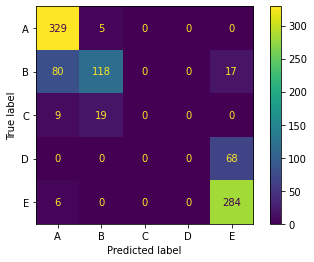

--------------------------------------------


In [12]:
engine.plot_results(isolation_predict, iso_X_test, iso_y_test)

### COMPARACAO DE RESULTADOS

In [13]:
# Unificando os resultados em um unico DF
resultados_df = pd.concat([
    pd.DataFrame(base_padrao_predict),
    pd.DataFrame(fse_predict),
    pd.DataFrame(isolation_predict),
    pd.DataFrame(cor_predict)

#     pd.DataFrame(iso_sfs_predict),
])

                   classificador                 tecnica  accuracy      f1  \
0            Regressão Logística                 Inicial    0.9652  0.9363   
0            Regressão Logística       Feature Selection    0.9929  0.9862   
0            Regressão Logística              Correlação    0.9431  0.9008   
0            Regressão Logística  Floresta de Isolamento    0.9380  0.9073   
1  Máquina de Vetores de Suporte                 Inicial    0.9821  0.9731   
1  Máquina de Vetores de Suporte       Feature Selection    0.9990  0.9953   
1  Máquina de Vetores de Suporte              Correlação    0.9990  0.9953   
1  Máquina de Vetores de Suporte  Floresta de Isolamento    0.9968  0.9904   
2        Perceptron Multicamadas                 Inicial    0.3231  0.0977   
2        Perceptron Multicamadas       Feature Selection    0.3333  0.1000   
2        Perceptron Multicamadas              Correlação    0.3333  0.1000   
2        Perceptron Multicamadas  Floresta de Isolamento    0.69

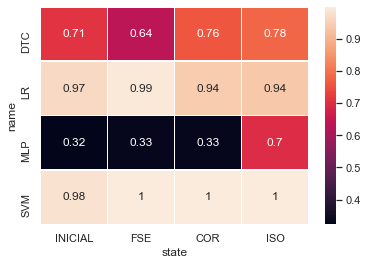

In [14]:
engine.plot_final_results(resultados_df)